In [1]:
import kagglehub
path = kagglehub.dataset_download("kaggle/kaggle-survey-2017")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/kaggle-survey-2017


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv(path + "/multipleChoiceResponses.csv", encoding='latin-1')
data.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [4]:
data.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [5]:
data.duplicated().sum()

np.int64(321)

In [6]:
data.drop_duplicates(inplace=True)

In [7]:
important_columns = [
    'GenderSelect', 'Country', 'Age', 'CurrentJobTitleSelect',
    'Tenure', 'WorkToolsSelect', 'LanguageRecommendationSelect',
    'CompensationAmount'
]
data = data[important_columns]
data.head()

,GenderSelect,Country,Age,CurrentJobTitleSelect,Tenure,WorkToolsSelect,LanguageRecommendationSelect,CompensationAmount
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,DBA/Database Engineer,More than 10 years,"Amazon Web services,Oracle Data Mining/ Oracle...",F#,NaN
1,Female,United States,30.0,NaN,Less than a year,NaN,Python,NaN
2,Male,Canada,28.0,NaN,3 to 5 years,NaN,R,NaN
3,Male,United States,56.0,Operations Research Practitioner,More than 10 years,"Amazon Machine Learning,Amazon Web services,Cl...",Python,"250,000"
4,Male,Taiwan,38.0,Computer Scientist,More than 10 years,"C/C++,Jupyter notebooks,MATLAB/Octave,Python,R...",Python,NaN


In [8]:
data = data.dropna(subset=important_columns)
data.head()

,GenderSelect,Country,Age,CurrentJobTitleSelect,Tenure,WorkToolsSelect,LanguageRecommendationSelect,CompensationAmount
3,Male,United States,56.0,Operations Research Practitioner,More than 10 years,"Amazon Machine Learning,Amazon Web services,Cl...",Python,"250,000"
8,Female,Australia,43.0,Business Analyst,3 to 5 years,SQL,Python,80000
9,Male,Russia,33.0,Software Developer/Software Engineer,1 to 2 years,"Jupyter notebooks,NoSQL,Python,R,SQL,Unix shel...",Python,1200000
11,Male,India,27.0,Data Scientist,3 to 5 years,"Python,Spark / MLlib,Tableau,TensorFlow,Other",Python,"95,000"
14,Male,Taiwan,26.0,Software Developer/Software Engineer,1 to 2 years,"Jupyter notebooks,MATLAB/Octave,Python,SAS Bas...",Python,1100000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5047 entries, 3 to 16577
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GenderSelect                  5047 non-null   object 
 1   Country                       5047 non-null   object 
 2   Age                           5047 non-null   float64
 3   CurrentJobTitleSelect         5047 non-null   object 
 4   Tenure                        5047 non-null   object 
 5   WorkToolsSelect               5047 non-null   object 
 6   LanguageRecommendationSelect  5047 non-null   object 
 7   CompensationAmount            5047 non-null   object 
dtypes: float64(1), object(7)
memory usage: 354.9+ KB


In [10]:
data.isna().sum()

,0
GenderSelect,0
Country,0
Age,0
CurrentJobTitleSelect,0
Tenure,0
WorkToolsSelect,0
LanguageRecommendationSelect,0
CompensationAmount,0


In [11]:
data['GenderSelect'].value_counts()

,count
GenderSelect,
Male,4285
Female,701
A different identity,32
"Non-binary, genderqueer, or gender non-conforming",29


In [12]:
valid_gender = ['Male', 'Female']
data = data[data['GenderSelect'].isin(valid_gender)]

In [13]:
data.reset_index(drop=True, inplace=True)
data.head()

,GenderSelect,Country,Age,CurrentJobTitleSelect,Tenure,WorkToolsSelect,LanguageRecommendationSelect,CompensationAmount
0,Male,United States,56.0,Operations Research Practitioner,More than 10 years,"Amazon Machine Learning,Amazon Web services,Cl...",Python,"250,000"
1,Female,Australia,43.0,Business Analyst,3 to 5 years,SQL,Python,80000
2,Male,Russia,33.0,Software Developer/Software Engineer,1 to 2 years,"Jupyter notebooks,NoSQL,Python,R,SQL,Unix shel...",Python,1200000
3,Male,India,27.0,Data Scientist,3 to 5 years,"Python,Spark / MLlib,Tableau,TensorFlow,Other",Python,"95,000"
4,Male,Taiwan,26.0,Software Developer/Software Engineer,1 to 2 years,"Jupyter notebooks,MATLAB/Octave,Python,SAS Bas...",Python,1100000


In [14]:
value_counts = data['Country'].value_counts()
valid_values = value_counts[value_counts > 10].index
data = data[data['Country'].isin(valid_values)]

In [15]:
data.isna().sum()

,0
GenderSelect,0
Country,0
Age,0
CurrentJobTitleSelect,0
Tenure,0
WorkToolsSelect,0
LanguageRecommendationSelect,0
CompensationAmount,0


In [16]:
data['Country'].value_counts()

,count
Country,
United States,1469
India,537
Other,253
United Kingdom,194
Germany,167
Russia,163
France,160
Brazil,151
Canada,143


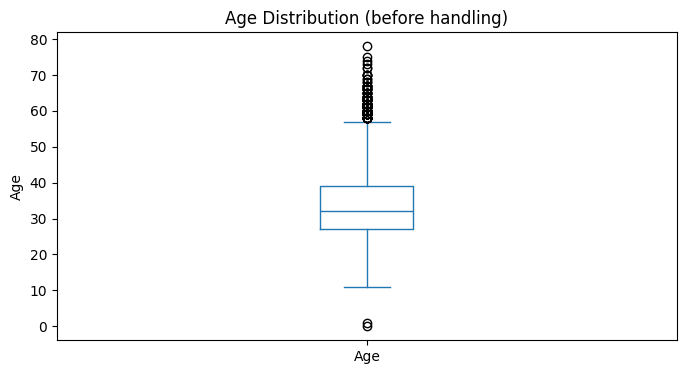

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
data['Age'].plot(kind='box', color='#1f77b4')
plt.title('Age Distribution (before handling)')
plt.ylabel('Age')
plt.show()

In [18]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce').clip(18, 70)

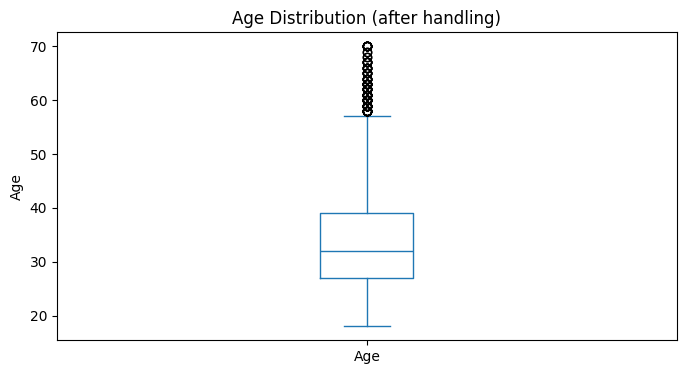

In [19]:
plt.figure(figsize=(8,4))
data['Age'].plot(kind='box', color='#1f77b4')
plt.title('Age Distribution (after handling)')
plt.ylabel('Age')
plt.show()

In [20]:
data['Age'] = data['Age'].astype('int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4957 entries, 0 to 4985
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   GenderSelect                  4957 non-null   object
 1   Country                       4957 non-null   object
 2   Age                           4957 non-null   int64 
 3   CurrentJobTitleSelect         4957 non-null   object
 4   Tenure                        4957 non-null   object
 5   WorkToolsSelect               4957 non-null   object
 6   LanguageRecommendationSelect  4957 non-null   object
 7   CompensationAmount            4957 non-null   object
dtypes: int64(1), object(7)
memory usage: 348.5+ KB


In [21]:
data.isna().sum()

,0
GenderSelect,0
Country,0
Age,0
CurrentJobTitleSelect,0
Tenure,0
WorkToolsSelect,0
LanguageRecommendationSelect,0
CompensationAmount,0


In [22]:
data['CurrentJobTitleSelect'].value_counts()

,count
CurrentJobTitleSelect,
Data Scientist,1465
Data Analyst,574
Software Developer/Software Engineer,516
Scientist/Researcher,453
Other,369
Machine Learning Engineer,308
Business Analyst,270
Researcher,243
Engineer,166


In [23]:
data['Tenure'].value_counts()

,count
Tenure,
3 to 5 years,1510
1 to 2 years,1127
More than 10 years,1011
6 to 10 years,894
Less than a year,401
I don't write code to analyze data,14


In [24]:
data['WorkToolsSelect'].value_counts()

,count
WorkToolsSelect,
R,71
"Python,R",66
Python,47
"Python,R,SQL",40
"R,SQL",39
...,...
"Microsoft R Server (Formerly Revolution Analytics),R,Stan",1
"IBM SPSS Modeler,IBM SPSS Statistics,Jupyter notebooks,Microsoft Azure Machine Learning,Python,SQL,Tableau",1
"C/C++,Hadoop/Hive/Pig,NoSQL,Python",1


In [25]:
value_counts = data['WorkToolsSelect'].value_counts()
valid_values = value_counts[value_counts > 10].index
data = data[data['WorkToolsSelect'].isin(valid_values)]

In [26]:
data['WorkToolsSelect'].value_counts()

,count
WorkToolsSelect,
R,71
"Python,R",66
Python,47
"Python,R,SQL",40
"R,SQL",39
"Jupyter notebooks,Python,R",27
"Python,TensorFlow",27
"Jupyter notebooks,Python,R,SQL",23
"Jupyter notebooks,Python,TensorFlow",22


In [27]:
data.isna().sum()

,0
GenderSelect,0
Country,0
Age,0
CurrentJobTitleSelect,0
Tenure,0
WorkToolsSelect,0
LanguageRecommendationSelect,0
CompensationAmount,0


In [28]:
data['LanguageRecommendationSelect'].value_counts()

,count
LanguageRecommendationSelect,
Python,350
R,194
Matlab,19
SQL,19
C/C++/C#,12
SAS,6
Other,4
Java,4
Scala,1


In [29]:
data['CompensationAmount'] = pd.to_numeric(data['CompensationAmount'], errors='coerce')
data = data.dropna(subset=['CompensationAmount'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 1 to 4975
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GenderSelect                  523 non-null    object 
 1   Country                       523 non-null    object 
 2   Age                           523 non-null    int64  
 3   CurrentJobTitleSelect         523 non-null    object 
 4   Tenure                        523 non-null    object 
 5   WorkToolsSelect               523 non-null    object 
 6   LanguageRecommendationSelect  523 non-null    object 
 7   CompensationAmount            523 non-null    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 36.8+ KB


In [30]:
data.isna().sum()

,0
GenderSelect,0
Country,0
Age,0
CurrentJobTitleSelect,0
Tenure,0
WorkToolsSelect,0
LanguageRecommendationSelect,0
CompensationAmount,0


In [31]:
avg_age_by_gender = data.groupby('GenderSelect')['Age'].mean()
avg_age_by_gender

,Age
GenderSelect,
Female,31.000000
Male,33.351351


In [32]:
top_languages = data['WorkToolsSelect'].explode().value_counts().head(5)
top_languages

,count
WorkToolsSelect,
R,63
"Python,R",56
Python,44
"Python,R,SQL",38
"R,SQL",31


In [33]:
top_job_titles = data['CurrentJobTitleSelect'].value_counts().head(5)
top_job_titles

,count
CurrentJobTitleSelect,
Data Scientist,103
Data Analyst,83
Scientist/Researcher,77
Other,48
Business Analyst,36


In [34]:
top_experience = data['Tenure'].value_counts().head(5)
top_experience

,count
Tenure,
1 to 2 years,160
3 to 5 years,144
Less than a year,77
More than 10 years,69
6 to 10 years,69


In [35]:
age_by_jobTitle = data.groupby('CurrentJobTitleSelect')['Age'].agg(['mean', 'min', 'max']).sort_values(by='mean', ascending=False).head(5)
age_by_jobTitle

,mean,min,max
CurrentJobTitleSelect,,,
Statistician,37.928571,24,62
Other,37.375000,22,65
Researcher,36.814815,22,70
Engineer,34.740741,21,60
Business Analyst,33.916667,23,57


In [36]:
print(f"- Average Age by Gender: {avg_age_by_gender.round(2)}")
print(f"- Top 5 Programming Languages: {top_languages}")
print(f"- Top 5 Job Titles: {top_job_titles}")
print(f"- Top 5 Experience Distribution: {top_experience}")
print(f"- Age Statistics for Top 5 Job Titles: {age_by_jobTitle.round(2)}")

- Average Age by Gender: GenderSelect
Female    31.00
Male      33.35
Name: Age, dtype: float64
- Top 5 Programming Languages: WorkToolsSelect
R               63
Python,R        56
Python          44
Python,R,SQL    38
R,SQL           31
Name: count, dtype: int64
- Top 5 Job Titles: CurrentJobTitleSelect
Data Scientist          103
Data Analyst             83
Scientist/Researcher     77
Other                    48
Business Analyst         36
Name: count, dtype: int64
- Top 5 Experience Distribution: Tenure
1 to 2 years          160
3 to 5 years          144
Less than a year       77
More than 10 years     69
6 to 10 years          69
Name: count, dtype: int64
- Age Statistics for Top 5 Job Titles:                         mean  min  max
CurrentJobTitleSelect                 
Statistician           37.93   24   62
Other                  37.38   22   65
Researcher             36.81   22   70
Engineer               34.74   21   60
Business Analyst       33.92   23   57


In [39]:
data.to_csv('cleaned_survey_data.csv', index=False)